In [121]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [122]:
warnings.filterwarnings('ignore')#ignore all the depricated warnings

In [123]:
#load the dataset
df=pd.read_csv('netflix_titles.csv')

In [124]:
#first do profiling of data
df.shape

(8807, 12)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [126]:
df.isnull().sum()#some missing values in it

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [127]:
#check percentage of misisng value in each column
df.isnull().sum()/df.shape[0]*100
#insights---about 30% missing values in director column

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [128]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [129]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [130]:
df.show_id.nunique()
#each id have a unique show id but this is in object columns, make it to int variable

8807

In [131]:
#drop show id columns it does not make sense here
df.drop('show_id',axis=1,inplace=True)

In [132]:
df.director.nunique()#this man diff director direct the shows or movies..

4528

In [133]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [134]:
df.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [135]:
#extract date time in date added colums
df['year']=df.date_added.str.split(',').str.get(1)

In [136]:
#month
df['months']=df.date_added.str.split(',').str.get(0).str.split(' ').str.get(0)

In [137]:
#day
df['day']=df.date_added.str.split(',').str.get(0).str.split(' ').str.get(1)

In [138]:
#now make it into int columns
df['year']=pd.to_numeric(df['year'],errors='coerce').astype('Int32')
df['day']=pd.to_numeric(df['day'],errors='coerce').astype('Int32')

In [139]:
#drop date addedd columns
df.drop('date_added',axis=1,inplace=True)

In [140]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year             Int32
months          object
day              Int32
dtype: object

In [141]:
df['release_year']=df['release_year'].astype('int32')#make into int type 32 

In [142]:
df.rating.unique()#here i find in duration column there is missing value ,and that mising value is presnt in this
#columns,so fix it

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [143]:
df.duration.isnull().sum()

3

In [144]:
#fix it
df['duration']=np.where(df['duration'].isna(),df['rating'],df['duration'])

In [145]:
df['rating'].replace(to_replace={'74 min':np.nan,'84 min':np.nan,'66 min':np.nan},inplace=True)

In [146]:
df.duration.unique()#we can do here like in season we split it and on an average there will be 8 episodes each of 40   inutes
#do that


array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [147]:
#write a fucntion to convert it in a  minutes
def change_duration(column):
    if 'min'in str(column):
        return str(column).split(' ')[0]
    elif 'Seasons'or 'Season' in str(column):
        split_=str(column).split(' ')[0]
        #for each season multiply it for 45
        return int(split_)*45

In [148]:
df['duration']=df['duration'].apply(change_duration)

In [149]:
df['duration']=df['duration'].astype('int')

In [150]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'year', 'months',
       'day'],
      dtype='object')

In [151]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int32
rating          object
duration         int32
listed_in       object
description     object
year             Int32
months          object
day              Int32
dtype: object

In [152]:
df['description']#drop it in eda we cant do much here

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [153]:
df['listed_in']#aslo drop it

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [154]:
df.drop(['listed_in','description'],axis=1,inplace=True)

In [155]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'year', 'months', 'day'],
      dtype='object')

In [156]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int32
rating          object
duration         int32
year             Int32
months          object
day              Int32
dtype: object

In [157]:
df.rating.unique()
#here for simplicity i can rename it rating by own understanding means by their rating meaning
df['rating']=df.rating.replace(to_replace={'PG-13':'13+'
                            ,'TV-MA':'18+','PG':'10+','TV-14':'14+','TV-PG':'10+','TV-Y':'all age group',
                             'TV-Y7':'7+','R':'17+','TV-G':'all age group',
                            'G':'all age group','NC-17':'18+','NR':np.nan,"TV-Y7-FV":'7+','UR':np.nan})

In [158]:
df

,type,title,director,cast,country,release_year,rating,duration,year,months,day
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,13+,90,2021,September,25
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,18+,90,2021,September,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,18+,45,2021,September,24
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,18+,45,2021,September,24
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,18+,90,2021,September,24
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,17+,158,2019,November,20
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,7+,90,2019,July,1
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,17+,88,2019,November,1
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,10+,88,2020,January,11


In [159]:
#univariate analysis
#separete categorical and numerical columns first
num=[col for col in df.columns if df[col].dtype!='object']

In [160]:
cat=[col for col in df.columns if df[col].dtype=='object']

In [161]:
cat

['type', 'title', 'director', 'cast', 'country', 'rating', 'months']

In [162]:
#one thing to be noted here ,sometime we can treat numerical columns as a cat column cus ,it more make sense
#rather then being a categorical

Text(0, 0.5, 'Count')

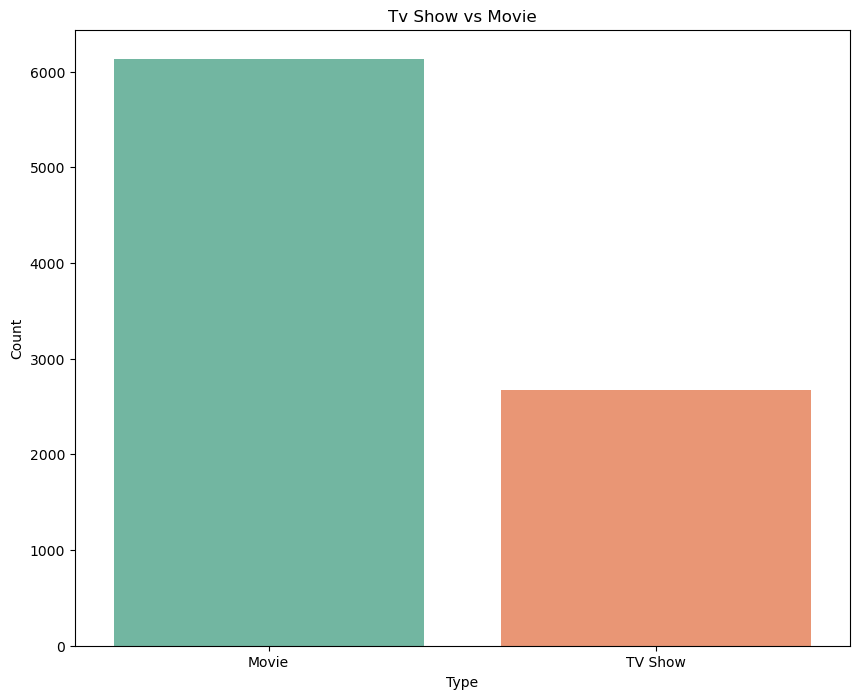

In [163]:
plt.figure(figsize=(10,8))
sns.countplot(x=df[cat[0]],data=df,palette='Set2')
plt.title('Tv Show vs Movie')
plt.xlabel('Type')
plt.ylabel('Count')
#insights-- clearly on netflix movies are highly watch or we can say that it is more in number 

Text(0, 0.5, 'Count')

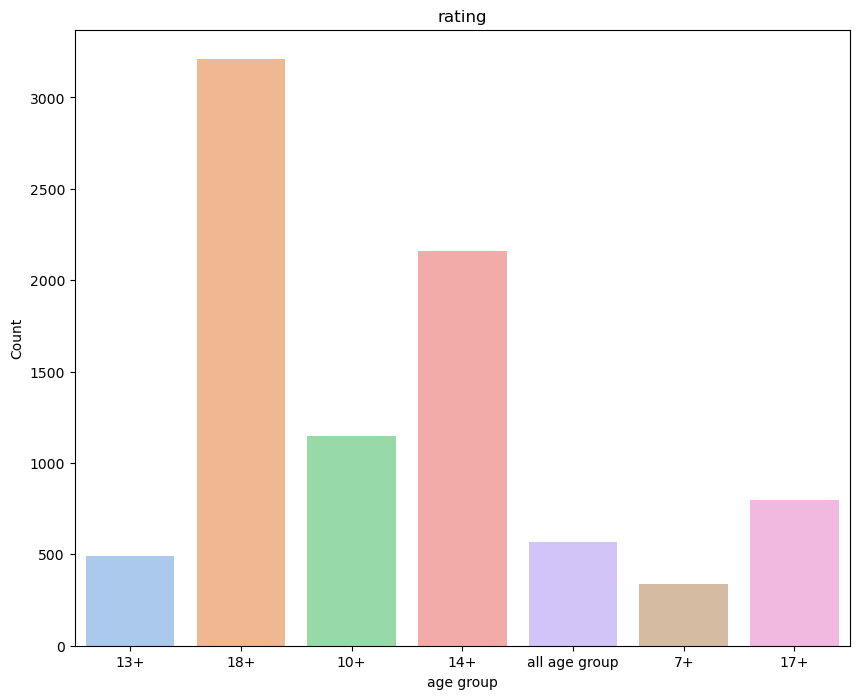

In [164]:
plt.figure(figsize=(10,8))
sns.countplot(x=df[cat[5]],data=df,palette='pastel')
plt.title('rating')
plt.xlabel('age group')
plt.ylabel('Count')
#insights-on netflix 18+ content movies or Tv show are more in number

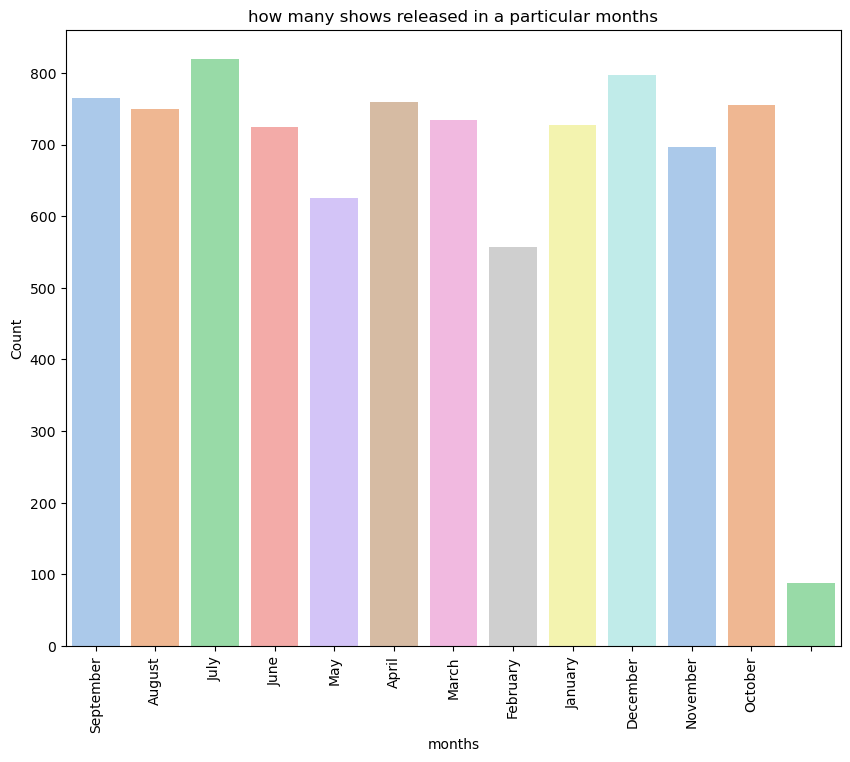

In [165]:
plt.figure(figsize=(10,8))
sns.countplot(x=df[cat[6]].dropna(),data=df,palette='pastel')
plt.title('how many shows released in a particular months')
plt.xlabel('months')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show(

)
#in feb and may ,released of shows is less compare to other months

In [166]:
df.rating.isnull().sum()

90

In [167]:
#bivariate analyasis

In [168]:
num

['release_year', 'duration', 'year', 'day']

In [169]:
cat

['type', 'title', 'director', 'cast', 'country', 'rating', 'months']

In [170]:
#in which year most nunber of released?
df.groupby('release_year')['type'].count().sort_values(ascending=False)
#isights-2018 have the highest number of releases

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: type, Length: 74, dtype: int64

<Axes: xlabel='release_year'>

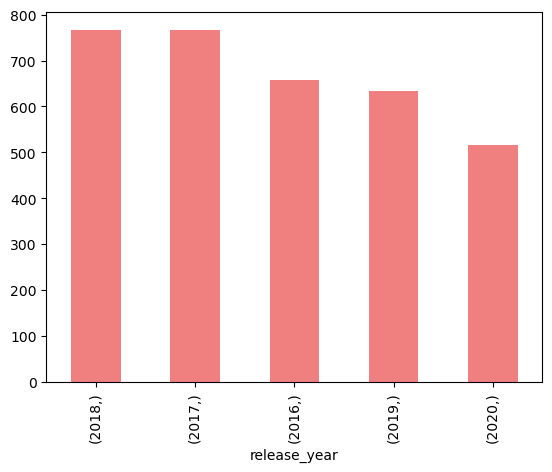

In [171]:
#in which year most number of movie released
df[df['type']=='Movie'][['release_year']].value_counts().head().plot(kind='bar',color='lightcoral')
#insights--2017 and 2018 are most number of  movie released

In [172]:
watch_time=df.groupby('type')['duration'].sum()/60

Text(0, 0.5, 'Watch time in hour')

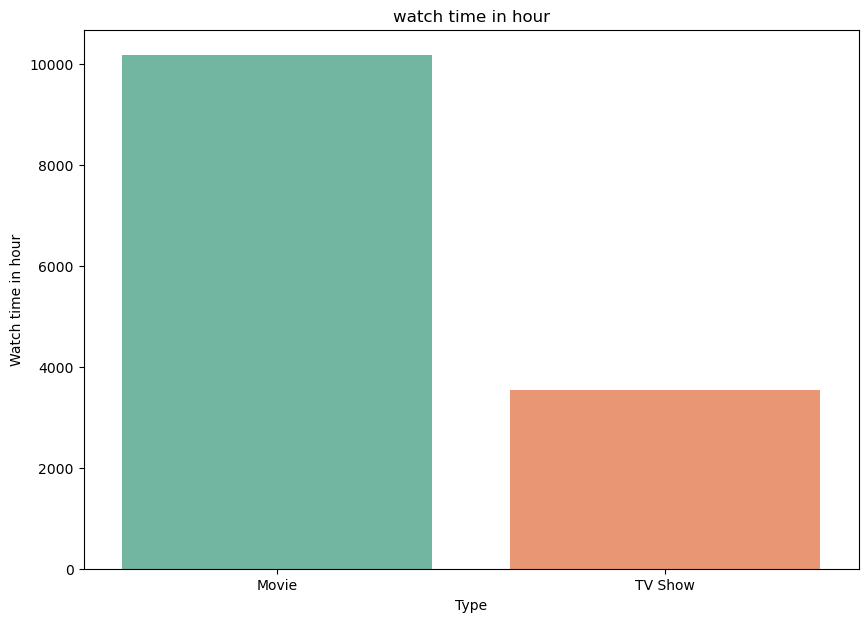

In [173]:
# what is the maximum watch time of differmt type first movie and second tv show??
#plottig bar plot
plt.figure(figsize=(10,7))
sns.barplot(data=watch_time,palette='Set2')
plt.title('watch time in hour')
plt.xlabel('Type')
plt.ylabel('Watch time in hour')

#insights-- movie watch time is much higher than Tv shows but it obvious movies on netlix is much higher than tv show 
#that could be also the factor of this

In [174]:
# which type has max  duration ?
df[['type','duration']].max()
#insights-Tv show has max  duration

type        TV Show
duration        765
dtype: object

In [208]:
# what is the title name of tv show which has max duartion
#insights--japense or chinese Tv show has the highst duration
df[df['type']=='TV Show'][['duration','title']].max()

duration     765
title       마녀사냥
dtype: object

In [196]:
#now clean the title here...
df[df['title']=='#FriendButMarried 2 ']

,type,title,director,cast,country,release_year,rating,duration,year,months,day


In [197]:
#done here
df['title']=np.where(df['title'].str.contains('#'),df['title'].str.split('#').str.get(1),df['title'])

In [202]:
df

,type,title,director,cast,country,release_year,rating,duration,year,months,day
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,13+,90,2021,September,25
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,18+,90,2021,September,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,18+,45,2021,September,24
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,18+,45,2021,September,24
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,18+,90,2021,September,24
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,17+,158,2019,November,20
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,7+,90,2019,July,1
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,17+,88,2019,November,1
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,10+,88,2020,January,11


In [210]:
cat

['type', 'title', 'director', 'cast', 'country', 'rating', 'months']

In [211]:
num

['release_year', 'duration', 'year', 'day']

<Axes: xlabel='country,type'>

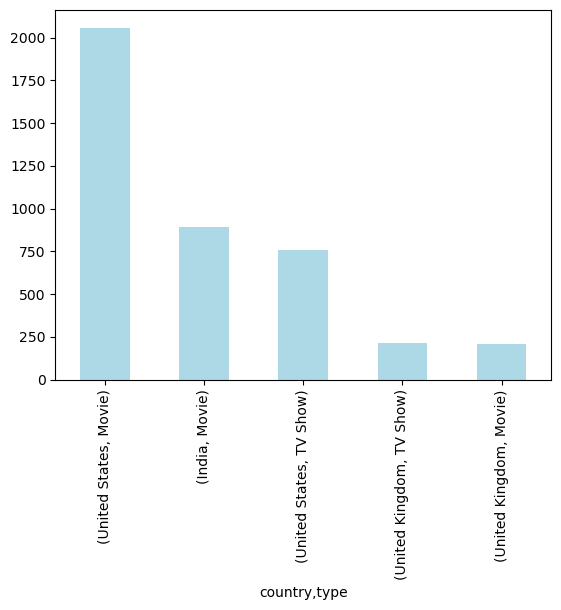

In [223]:
#which country released most tv show pr movie?
df[['country','type']].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color='lightblue')

#insights--USA dominating  in Movie  and TV Show ,while INDIA is on second position in movie 

In [229]:
# in which months does most tv show and movie released?
pd.crosstab(df['type'],df['months'])

#insghts--in each month releases of movie is almost similar to other months,while Tv show differ

months,,April,August,December,February,January,July,June,March,May,November,October,September
type,,,,,,,,,,,,,
Movie,0,550,519,547,382,546,565,492,529,439,498,545,519
TV Show,88,209,230,250,175,181,254,232,205,187,199,210,246


In [237]:
# from which country ,the rating having 18+ content..
df[df['rating']=='18+'][['country']].value_counts(normalize=True)*100

#insights--31% of american content are 18+

country                            
United States                          31.663258
India                                   8.452624
United Kingdom                          6.032720
Spain                                   4.055896
Japan                                   2.965235
                                         ...    
Italy, Switzerland, Albania, Poland     0.034083
Italy, Turkey                           0.034083
Italy, United Kingdom                   0.034083
Italy, United Kingdom, France           0.034083
West Germany                            0.034083
Name: proportion, Length: 315, dtype: float64

In [238]:
# now ,we can do more in EDA and asking right question, but i'll stop here
#futher you can do more cleaning,and feautre engering an prepare model for ml